In [ ]:
#setting everything up
## Install libraries
! python -m pip install --upgrade pip --quiet --user
! pip3 install sentence_transformers --user

In [ ]:
#impoirting pretrained models
#A list of models: https://www.sbert.net/docs/pretrained_models.html
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

In [ ]:
query_embedding = model.encode('How big is London')
#a 384x1 vector representation of a sentence
query_embedding

In [30]:
#trying out things with vectors
passage_embedding = model.encode(['How big is London',
                                  'How big is London?',
                                  "London is big",
                                  "London is 200 miles wide, 700 miles long",
                                  'London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its financial district',
                                  "Hanoi is big"])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

Similarity: tensor([[1.0000, 0.9601, 0.9103, 0.7717, 0.5472, 0.5947, 0.2450]])


In [32]:
#word object class
class Word:
    '''
    A class used to represent a word
    
    Attributes
    ----------
    word : str
        the original word in Bahnar language
    meaning : str
        the meaning of the word in an English sentence
    vector : arraylike
        the vector representation of the word's meaning

    Methods
    -------
    get_word()
        returns the word
    get_meaning()
        returns the meaning
    get_vector()
        returns the vector representation
    '''
    def __init__(self, word: str, meaning: str) -> None:
        self.word = word
        self.meaning = meaning
        if len(meaning) == 0 or len(word) == 0:
            raise Exception("No empty strings allowed")
        if not type(meaning) is str:
            raise TypeError("Only strings are allowed")
        self.vector = model.encode(meaning)
    def get_word(self):
        return self.word
    def get_meaning(self):
        return self.meaning
    def get_vector(self):
        return self.vector
    

In [33]:
#sample word array or something 
word_array = [
    Word("ERECH", "Small birds that cause a lot of damage in rice fields when the rice ripens."),
    Word("JÔMRANG", "Cockscomb, or other bird."),
    Word("JỞROL", "Pretty crested egret bird."),
    Word("BLUNG", "A type of fish."),
    Word("HLOR", "Very small river fish."),
    Word("XAKENG", "Kind of black fish."),
    Word("ANG", "Light, luminous, shine, shine."),
    Word("UNH", "Fire"),
    Word("PLA", "Flame, blade."),
    Word("XADRÂM", "The place of the river, the fountain, where we draw water for the household."),
    Word("XOK", "Small bay or cove in rivers."),
    Word("OR", "Low, wet ground near. watercourses.")
]

In [34]:
word_array[0].vector

array([ 5.84481321e-02,  1.42300744e-02,  1.17052011e-01, -2.25790255e-02,
        7.22781643e-02, -5.15023246e-02, -3.13781910e-02, -8.31676051e-02,
       -3.34396400e-02,  6.85248002e-02,  3.21149081e-02, -9.01618078e-02,
       -8.42146873e-02,  2.08778423e-03, -6.09122701e-02,  4.41895723e-02,
       -5.83436601e-02, -9.58826113e-03, -4.97397371e-02, -1.42365822e-03,
       -4.24858145e-02,  8.36558565e-02,  2.03805827e-02,  5.89754730e-02,
       -4.95012701e-02,  2.54199393e-02, -6.46546930e-02,  4.08312902e-02,
       -1.96684226e-02, -5.41188642e-02, -3.02407499e-02,  1.11720026e-01,
       -1.10574346e-02,  6.06064573e-02,  2.66975462e-02,  6.06386214e-02,
        7.42570236e-02, -8.79151560e-03,  1.12781599e-01, -1.40531957e-02,
        1.50981434e-02, -6.02149591e-02,  5.97045720e-02, -3.96346152e-02,
        8.46335955e-04, -4.78352048e-02, -6.10960238e-02, -4.87214848e-02,
        6.41639605e-02, -2.60269511e-02,  1.33003583e-02, -2.87595522e-02,
       -2.00439356e-02,  

In [36]:
import pandas as pd 

df = pd.DataFrame({"word": [word_object.word for word_object in word_array], 
                   "meaning": [word_object.meaning for word_object in word_array], 
                   "vector": [word_object.vector for word_object in word_array]})
df

,word,meaning,vector
0,ERECH,Small birds that cause a lot of damage in rice...,"[0.058448132, 0.014230074, 0.11705201, -0.0225..."
1,JÔMRANG,"Cockscomb, or other bird.","[0.051944517, 0.071099885, -0.016151458, 0.032..."
2,JỞROL,Pretty crested egret bird.,"[-0.0072099436, 0.07018218, 0.08195463, 0.0169..."
3,BLUNG,A type of fish.,"[-0.047699686, 0.05397324, 0.017783787, 0.0082..."
4,HLOR,Very small river fish.,"[0.048968807, 0.11964024, 0.04460531, 0.018488..."
5,XAKENG,Kind of black fish.,"[-0.026418686, 0.03211751, -0.048472308, 0.048..."
6,ANG,"Light, luminous, shine, shine.","[-0.028715525, 0.024557987, 0.033056963, 0.030..."
7,UNH,Fire,"[0.0071615987, 0.10473713, 0.015049643, 0.0478..."
8,PLA,"Flame, blade.","[-0.028150009, 0.09359826, -0.013589192, 0.031..."
9,XADRÂM,"The place of the river, the fountain, where we...","[0.05129618, 0.07615172, 0.040026437, 0.051134..."


In [66]:
from nltk.cluster import KMeansClusterer
import numpy as np
import nltk

def clustering_question(data,NUM_CLUSTERS = 3):
    X = np.array(data['vector'].tolist())
    kclusterer = KMeansClusterer(
        NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance,
        repeats=25,avoid_empty_clusters=True)

    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
    data['cluster'] = pd.Series(assigned_clusters, index=data.index)
    return data
results = clustering_question(df)
results

,word,meaning,vector,cluster
0,ERECH,Small birds that cause a lot of damage in rice...,"[0.058448132, 0.014230074, 0.11705201, -0.0225...",0
1,JÔMRANG,"Cockscomb, or other bird.","[0.051944517, 0.071099885, -0.016151458, 0.032...",0
2,JỞROL,Pretty crested egret bird.,"[-0.0072099436, 0.07018218, 0.08195463, 0.0169...",0
3,BLUNG,A type of fish.,"[-0.047699686, 0.05397324, 0.017783787, 0.0082...",0
4,HLOR,Very small river fish.,"[0.048968807, 0.11964024, 0.04460531, 0.018488...",1
5,XAKENG,Kind of black fish.,"[-0.026418686, 0.03211751, -0.048472308, 0.048...",0
6,ANG,"Light, luminous, shine, shine.","[-0.028715525, 0.024557987, 0.033056963, 0.030...",2
7,UNH,Fire,"[0.0071615987, 0.10473713, 0.015049643, 0.0478...",2
8,PLA,"Flame, blade.","[-0.028150009, 0.09359826, -0.013589192, 0.031...",2
9,XADRÂM,"The place of the river, the fountain, where we...","[0.05129618, 0.07615172, 0.040026437, 0.051134...",1


In [72]:
#SVD for visualization
u, s, v = np.linalg.svd(np.array(df['vector'].tolist()), full_matrices=True)
flat_vectors = u[:,0:2]

In [73]:
results["cluster"].iloc[0]

0

<function matplotlib.pyplot.show(close=None, block=None)>

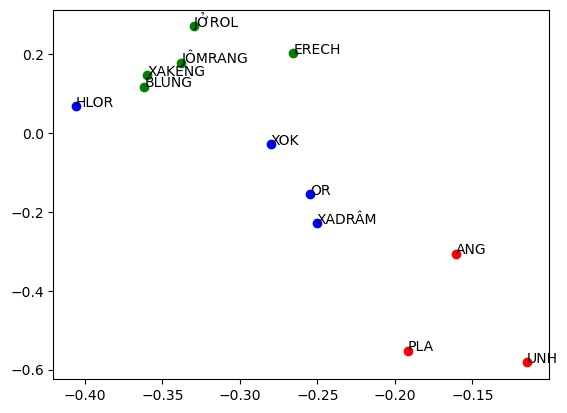

In [74]:
#visualization
import matplotlib.pyplot as plt

colors = ["green", "blue", "red"]
for i in range(len(results)):
    plt.scatter(flat_vectors[i][0], flat_vectors[i][1], color = colors[results["cluster"].iloc[i]])
    plt.annotate(results["word"].iloc[i], (flat_vectors[i][0], flat_vectors[i][1]))
plt.show
